<a href="https://colab.research.google.com/github/AkSharma9604/AKsharma/blob/main/Multithreading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running with 1 processes...
Running with 2 processes...

Processes vs Time Taken (min):
Processes: 1, Time Taken: 0.31 min
Processes: 2, Time Taken: 0.30 min


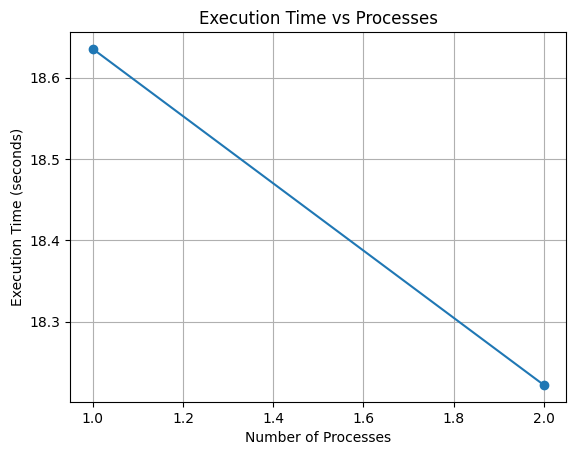

In [4]:
import numpy as np
import time
from concurrent.futures import ProcessPoolExecutor
import matplotlib.pyplot as plt
import os

# Function to perform matrix multiplication
def multiply_matrices(A, B):
    return np.dot(A, B)

# Define a top-level function for the multiplication operation
def multiply_wrapper(args):
    """Wrapper function for multiprocessing"""
    A, B = args
    return multiply_matrices(A, B)

# Function to run the task for a given number of processes
def task(process_count, matrices, B):
    start_time = time.time()
    with ProcessPoolExecutor(max_workers=process_count) as executor:
        # Use the wrapper function for executor.map
        results = list(executor.map(multiply_wrapper, [(A, B) for A in matrices]))
    end_time = time.time()
    return end_time - start_time

# Main function
def main():
    # Matrix size and number of matrices
    MATRIX_SIZE = 1000  # Reduced matrix size
    NUM_MATRICES = 100  # Reduced number of matrices
    A_matrices = [np.random.rand(MATRIX_SIZE, MATRIX_SIZE) for _ in range(NUM_MATRICES)]
    B_matrix = np.random.rand(MATRIX_SIZE, MATRIX_SIZE)

    # Determine process counts (up to number of cores)
    max_processes = os.cpu_count()
    process_counts = list(range(1, max_processes + 1))

    # Measure execution time
    execution_times = []
    for processes in process_counts:
        print(f"Running with {processes} processes...")
        time_taken = task(processes, A_matrices, B_matrix)
        execution_times.append(time_taken)

    # Print results in table format
    print("\nProcesses vs Time Taken (min):")
    for p, time_taken in zip(process_counts, execution_times):
        print(f"Processes: {p}, Time Taken: {time_taken / 60:.2f} min")

    # Plot the results
    plt.plot(process_counts, execution_times, marker='o')
    plt.xlabel('Number of Processes')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Execution Time vs Processes')
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()